In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

**User Acquisition**

In [141]:
df1=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=1)
df1

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Display,9957,12008,0.544457,1.206107,58.86209,204820,37434,0
1,Organic Search,7652,18141,0.813680,2.367041,534.31280,770710,109801,0
2,Paid Search,3025,4408,0.474284,1.458154,102.23780,81997,14770,0
3,Direct,1903,4975,0.318808,2.261364,1128.88100,227434,31093,0
4,Unassigned,325,1619,0.813159,4.981538,798.34150,33320,789,0
5,Organic Social,10,13,0.722222,1.300000,145.30000,248,27,0


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   First user default channel group  6 non-null      object 
 1   New users                         6 non-null      int64  
 2   Engaged sessions                  6 non-null      int64  
 3   Engagement rate                   6 non-null      float64
 4   Engaged sessions per user         6 non-null      float64
 5   Average engagement time           6 non-null      float64
 6   Event count                       6 non-null      int64  
 7   Conversions                       6 non-null      int64  
 8   Total revenue                     6 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 560.0+ bytes


In [143]:
df1=df1.drop(df1[df1['First user default channel group'] == 'Unassigned'].index)
df1.reset_index(drop=True,inplace=True)
df1

,First user default channel group,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Display,9957,12008,0.544457,1.206107,58.86209,204820,37434,0
1,Organic Search,7652,18141,0.813680,2.367041,534.31280,770710,109801,0
2,Paid Search,3025,4408,0.474284,1.458154,102.23780,81997,14770,0
3,Direct,1903,4975,0.318808,2.261364,1128.88100,227434,31093,0
4,Organic Social,10,13,0.722222,1.300000,145.30000,248,27,0


In [144]:
df1.drop('Total revenue',axis=1,inplace=True)

In [145]:
# Conversion rate
(df1['Conversions'] / df1['Event count'])

0    0.182765
1    0.142467
2    0.180129
3    0.136712
4    0.108871
dtype: float64

Conversions by Entry Channel

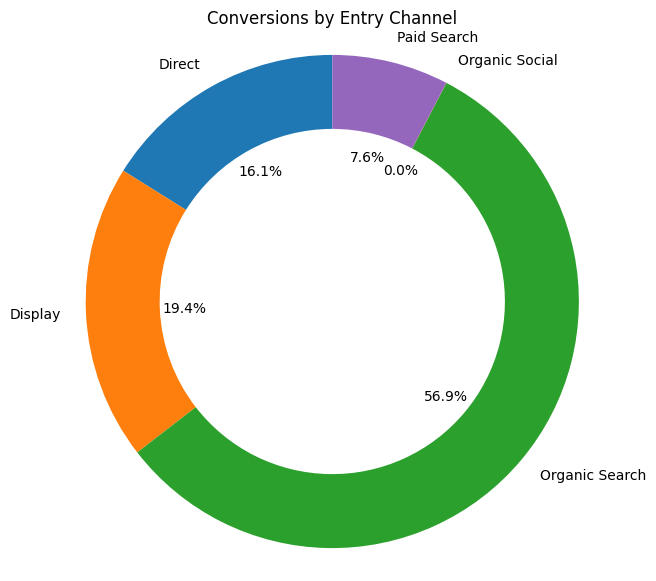

In [146]:
df1_pie = df1.groupby('First user default channel group')['Conversions'].sum()

plt.figure(figsize=(7, 7))
plt.pie(df1_pie, labels=df1_pie.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Conversions by Entry Channel')
plt.show()

Correlation Heatmap

<Axes: >

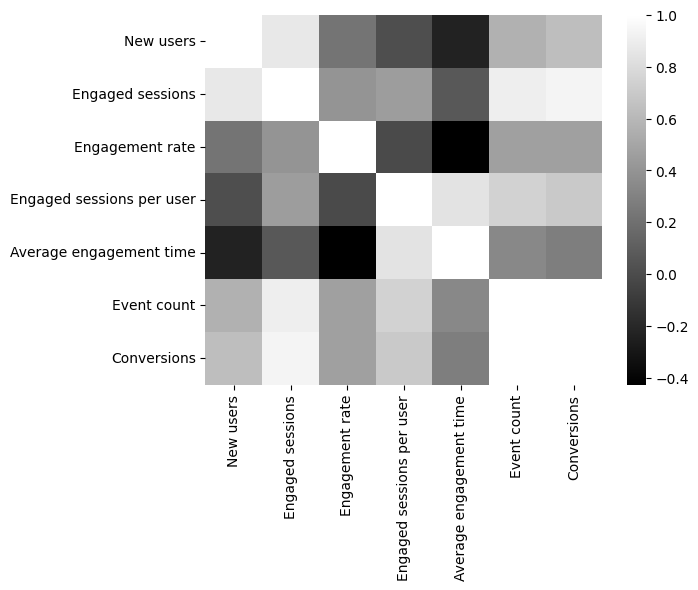

In [147]:
sns.heatmap(df1.corr(numeric_only=True),cmap='gray')

New users vs Engaged sessions by Entry channel

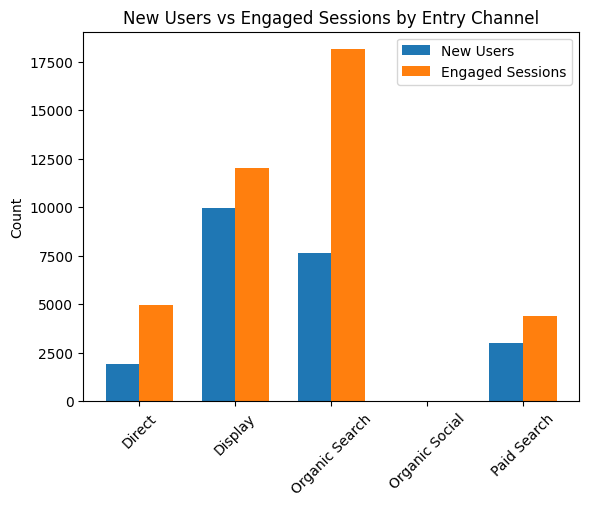

In [148]:
df1_bar = df1.groupby('First user default channel group')[['New users', 'Engaged sessions']].sum()

labels = df1_bar.index
new_users = df1_bar['New users']
engaged_sessions = df1_bar['Engaged sessions']

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_users, width, label='New Users')
rects2 = ax.bar(x + width/2, engaged_sessions, width, label='Engaged Sessions')

ax.set_ylabel('Count')
ax.set_title('New Users vs Engaged Sessions by Entry Channel')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

Relationship b/w Engaged sessions and Event count

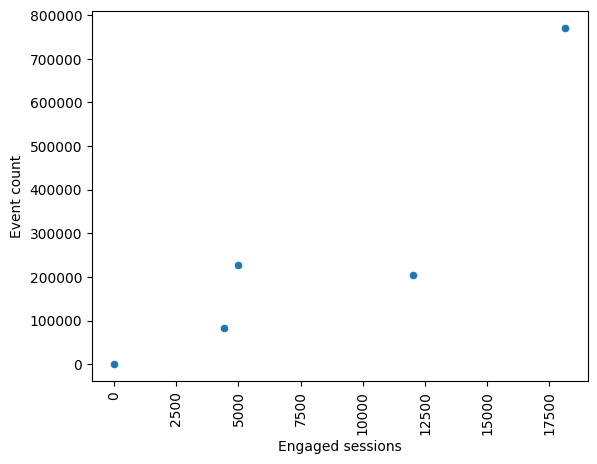

In [149]:
sns.scatterplot(x=df1['Engaged sessions'],y=df1['Event count'])
plt.xticks(rotation=90)
plt.show()

**Traffic Aquisition**

In [150]:
df2=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=2)
df2

,Session default channel group,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Conversions,Total revenue
0,Unassigned,20263,13448,1481,34.11704,0.073089,18.023130,0.110128,242375,114161,0
1,Display,9613,18292,10613,28.52198,1.104026,9.069320,0.580199,165896,20031,0
2,Organic Search,7689,21241,17814,195.94340,2.316816,29.302290,0.838661,622410,33612,0
3,Direct,4042,13220,7649,177.17060,1.892380,17.135850,0.578593,226536,18496,0
4,Paid Search,2909,6788,3452,36.65321,1.186662,8.989982,0.508544,61024,7595,0
5,Organic Social,11,16,12,60.06250,1.090909,18.000000,0.750000,288,19,0


In [151]:
df2 = df2.drop(df2[df2['Session default channel group'] == 'Unassigned'].index)

In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Session default channel group        5 non-null      object 
 1   Users                                5 non-null      int64  
 2   Sessions                             5 non-null      int64  
 3   Engaged sessions                     5 non-null      int64  
 4   Average engagement time per session  5 non-null      float64
 5   Engaged sessions per user            5 non-null      float64
 6   Events per session                   5 non-null      float64
 7   Engagement rate                      5 non-null      float64
 8   Event count                          5 non-null      int64  
 9   Conversions                          5 non-null      int64  
 10  Total revenue                        5 non-null      int64  
dtypes: float64(4), int64(6), object(1)
m

In [153]:
df2.drop('Total revenue',axis=1,inplace=True)

In [154]:
# Conversion rate
df2['Conversion Rate']=(df2['Conversions'] / df2['Event count'])
df2

,Session default channel group,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Conversions,Conversion Rate
1,Display,9613,18292,10613,28.52198,1.104026,9.069320,0.580199,165896,20031,0.120744
2,Organic Search,7689,21241,17814,195.94340,2.316816,29.302290,0.838661,622410,33612,0.054003
3,Direct,4042,13220,7649,177.17060,1.892380,17.135850,0.578593,226536,18496,0.081647
4,Paid Search,2909,6788,3452,36.65321,1.186662,8.989982,0.508544,61024,7595,0.124459
5,Organic Social,11,16,12,60.06250,1.090909,18.000000,0.750000,288,19,0.065972


Users vs Engaged Sessions by Entry Channel

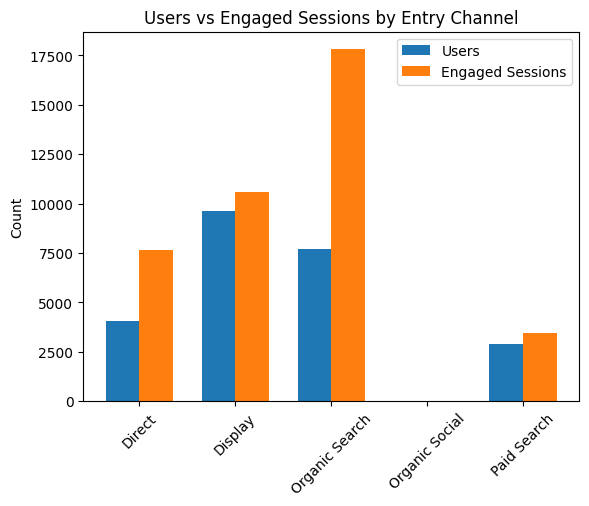

In [155]:
df2_bar = df2.groupby('Session default channel group')[['Users', 'Engaged sessions']].sum()

labels = df2_bar.index
new_users = df2_bar['Users']
engaged_sessions = df2_bar['Engaged sessions']

x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_users, width, label='Users')
rects2 = ax.bar(x + width/2, engaged_sessions, width, label='Engaged Sessions')

ax.set_ylabel('Count')
ax.set_title('Users vs Engaged Sessions by Entry Channel')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

Relationship b/w Engaged sessions Vs Conversions

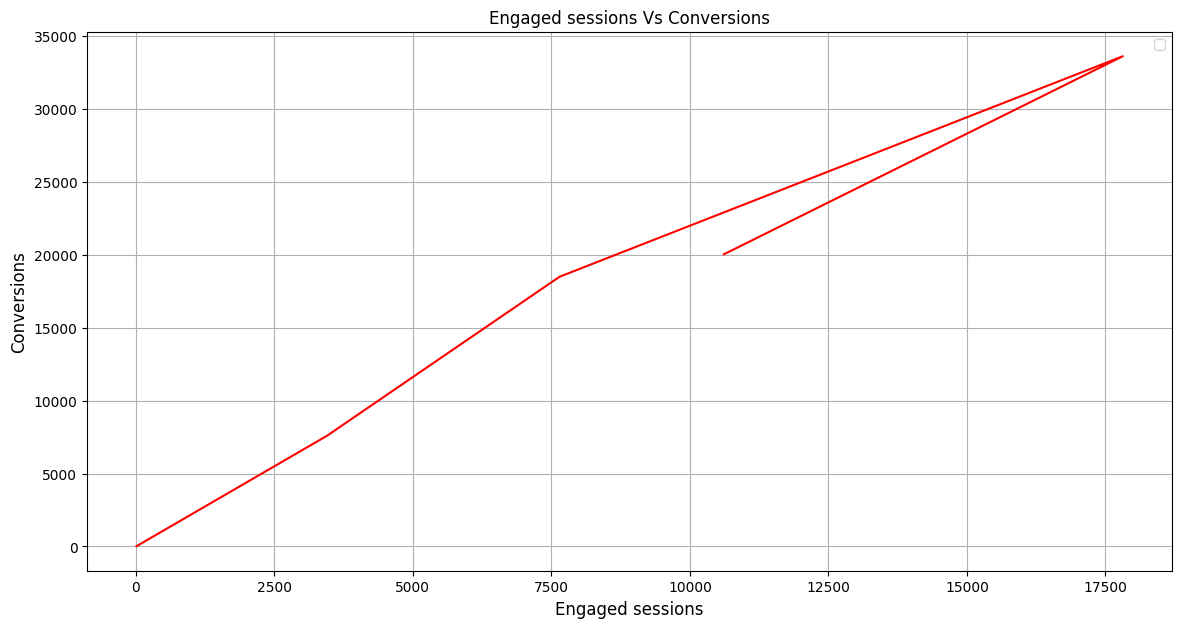

In [156]:
plt.figure(figsize=(14,7))
plt.plot(df2['Engaged sessions'],df2['Conversions'],color='red')
plt.legend()
plt.xlabel('Engaged sessions',fontsize=12)
plt.ylabel('Conversions',fontsize=12)
plt.title('Engaged sessions Vs Conversions')
plt.grid()
plt.show()

**Event Report**

In [157]:
df3=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=3)
df3

,Event name,Event count,Total users,Event count per user,Total revenue
0,screen_view,694729,23254,30.865870,0
1,notification_receive,125146,1700,138.896800,0
2,user_engagement,124836,22699,5.622230,0
3,notification_dismiss,70128,1369,144.000000,0
4,session_start,61163,23226,3.121357,0
...,...,...,...,...,...
374,Promilo119_myProfile_mediator,1,1,1.000000,0
375,Promilo_feeds,1,1,1.000000,0
376,feeds,1,1,1.000000,0
377,my_interests_screen,1,1,1.000000,0


In [158]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event name            378 non-null    object 
 1   Event count           379 non-null    int64  
 2   Total users           379 non-null    int64  
 3   Event count per user  379 non-null    float64
 4   Total revenue         379 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.9+ KB


In [159]:
df3.isnull().sum()

Event name              1
Event count             0
Total users             0
Event count per user    0
Total revenue           0
dtype: int64

In [160]:
df3[df3.isnull().any(axis=1)]

,Event name,Event count,Total users,Event count per user,Total revenue
179,NaN,80,5,16.0,0


In [161]:
df3=df3.dropna()

In [162]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 378
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event name            378 non-null    object 
 1   Event count           378 non-null    int64  
 2   Total users           378 non-null    int64  
 3   Event count per user  378 non-null    float64
 4   Total revenue         378 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 17.7+ KB


In [163]:
df3.duplicated().sum()

0

In [164]:
df3.describe()

,Event count,Total users,Event count per user,Total revenue
count,378.000000,378.000000,378.000000,378.0
mean,3487.960317,585.113757,3.186840,0.0
std,37122.358042,2794.989519,10.396199,0.0
min,0.000000,1.000000,0.000000,0.0
25%,7.000000,3.250000,1.251225,0.0
50%,62.000000,31.500000,1.750000,0.0
75%,508.750000,238.000000,2.755974,0.0
max,694729.000000,23254.000000,144.000000,0.0


In [165]:
df3_new = df3[df3['Event count per user'] > 5.5]
df3_new.reset_index(drop=True, inplace=True)
df3_new

,Event name,Event count,Total users,Event count per user,Total revenue
0,screen_view,694729,23254,30.865870,0
1,notification_receive,125146,1700,138.896800,0
2,user_engagement,124836,22699,5.622230,0
3,notification_dismiss,70128,1369,144.000000,0
4,Promilo111_feeds,6240,1045,5.988484,0
5,Promilo1116_my_rewards_screen,5863,884,6.632353,0
6,Promilo1114_my_rewards_screen,4774,509,9.379175,0
7,Promilo111_my_rewards_screen,4056,488,8.311475,0
8,Promilo113_my_rewards_screen,3623,370,9.791892,0
9,Promilo1117_my_rewards_screen,2757,371,7.431267,0


Event count per user for Event name

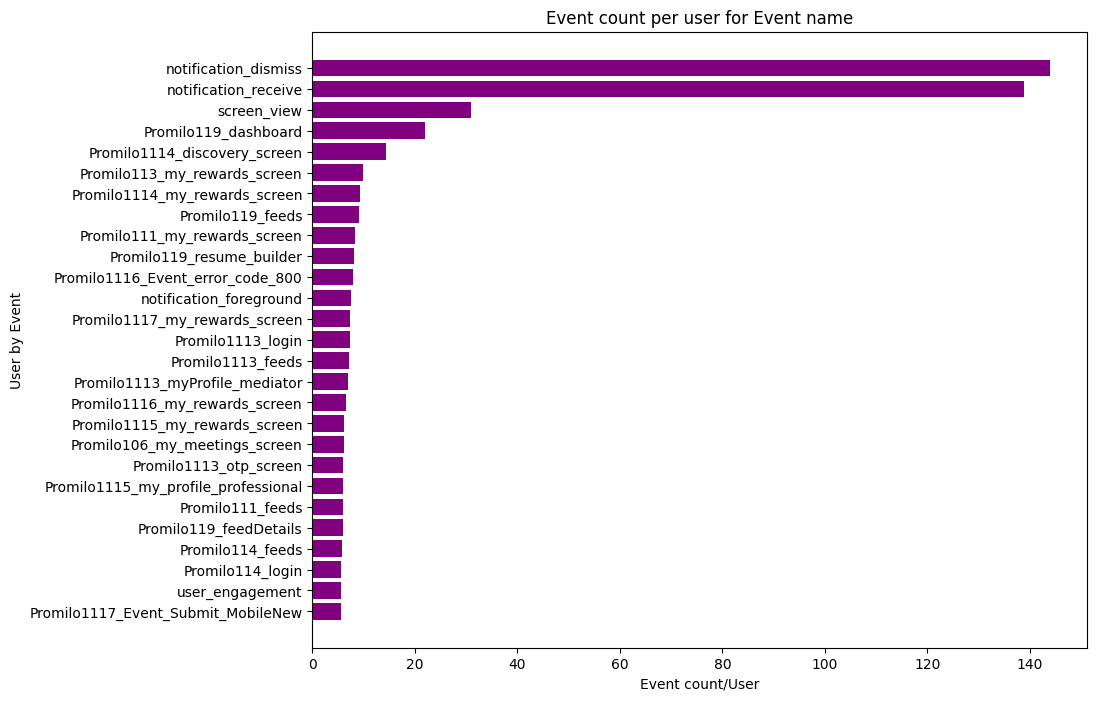

In [166]:
plt.figure(figsize=(10,8))

df3_new_sorted = df3_new.sort_values(by='Event count per user', ascending=False)

plt.barh(df3_new_sorted['Event name'], df3_new_sorted['Event count per user'], color='purple')
plt.xlabel('Event count/User')
plt.ylabel('User by Event')
plt.title('Event count per user for Event name')
plt.gca().invert_yaxis()

plt.show()

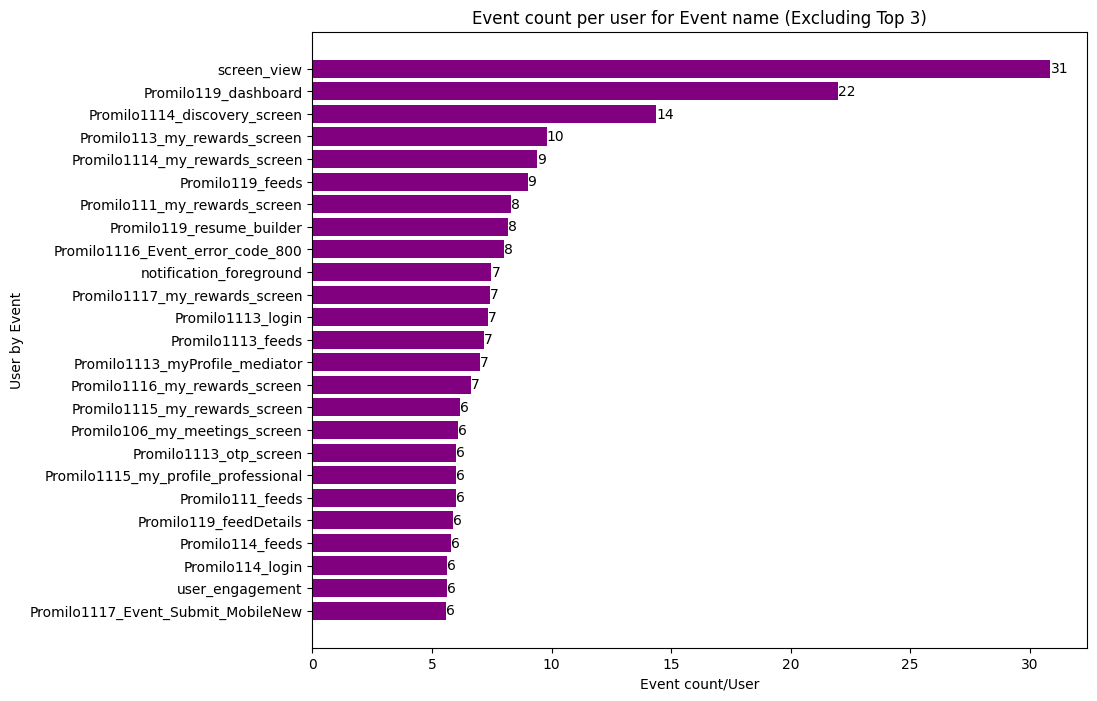

In [167]:
plt.figure(figsize=(10,8))

df3_new_sorted_excluding_top2 = df3_new_sorted.iloc[2:]

bars = plt.barh(df3_new_sorted_excluding_top2['Event name'], df3_new_sorted_excluding_top2['Event count per user'], color='purple')
plt.xlabel('Event count/User')
plt.ylabel('User by Event')
plt.title('Event count per user for Event name (Excluding Top 3)')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             '{:.0f}'.format(bar.get_width()),
             va='center', ha='left', color='black')

plt.show()

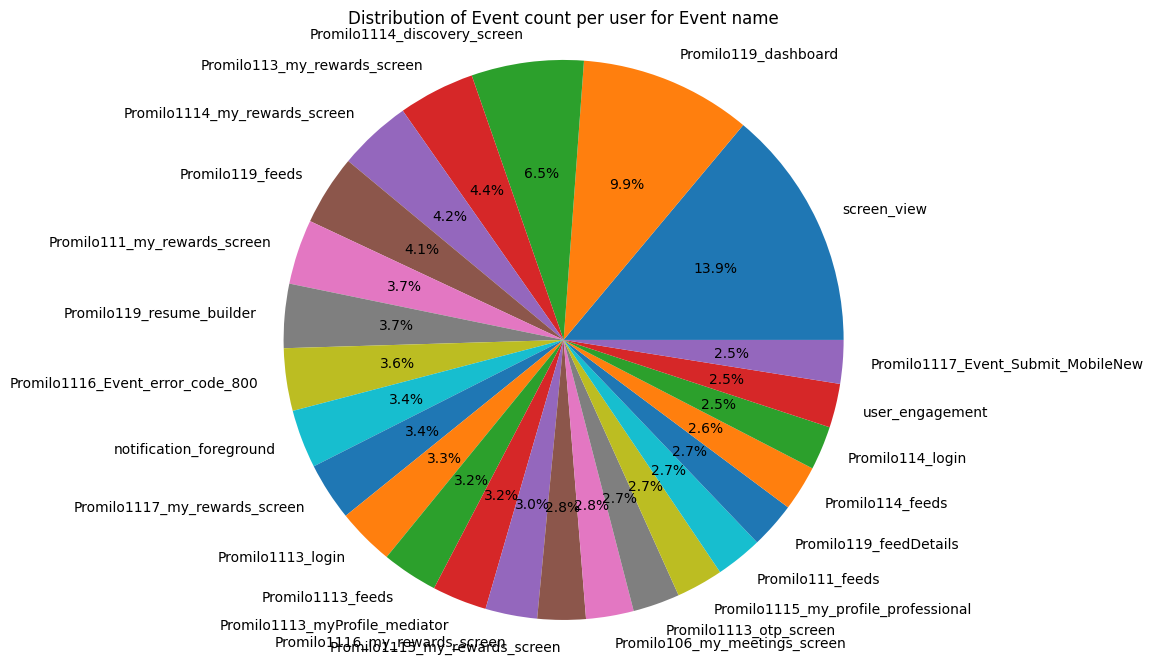

In [168]:
plt.figure(figsize=(10, 8))
plt.pie(df3_new_sorted_excluding_top2['Event count per user'], labels=df3_new_sorted_excluding_top2['Event name'],
        autopct='%1.1f%%')
plt.title('Distribution of Event count per user for Event name')
plt.axis('equal')
plt.show()

**Conversion Report**

In [169]:
df4=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=4)
df4

,Event name,Conversions,Total users,Total revenue
0,notification_receive,94890,1311,0
1,session_start,56203,21674,0
2,first_open,22872,23059,0
3,app_remove,12468,12538,0
4,Promilo111_otp_screen,1738,855,0
5,Promilo111_Event_Enter_Feed_Page,1594,969,0
6,Promilo106_login,1458,603,0
7,Promilo106_feeds,683,185,0
8,os_update,672,634,0
9,notification_open,569,308,0


In [170]:
df4.drop('Total revenue',axis=1,inplace=True)

In [171]:
df4['avg_conversion_rate'] = df4['Conversions'] / df4['Total users']
df4

,Event name,Conversions,Total users,avg_conversion_rate
0,notification_receive,94890,1311,72.379863
1,session_start,56203,21674,2.593107
2,first_open,22872,23059,0.991890
3,app_remove,12468,12538,0.994417
4,Promilo111_otp_screen,1738,855,2.032749
5,Promilo111_Event_Enter_Feed_Page,1594,969,1.644995
6,Promilo106_login,1458,603,2.417910
7,Promilo106_feeds,683,185,3.691892
8,os_update,672,634,1.059937
9,notification_open,569,308,1.847403


Average Conversion rate for Event

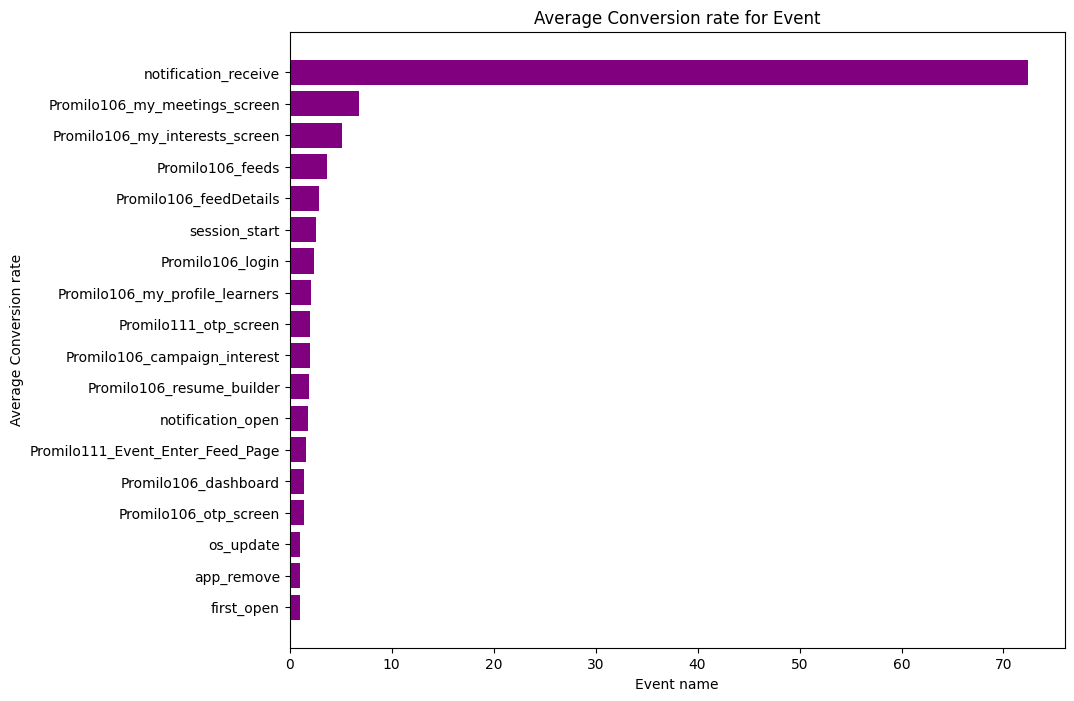

In [172]:
plt.figure(figsize=(10,8))

df4_sorted = df4.sort_values(by='avg_conversion_rate', ascending=False)

plt.barh(df4_sorted['Event name'], df4_sorted['avg_conversion_rate'], color='purple')
plt.xlabel('Event name')
plt.ylabel('Average Conversion rate')
plt.title('Average Conversion rate for Event')
plt.gca().invert_yaxis()

plt.show()

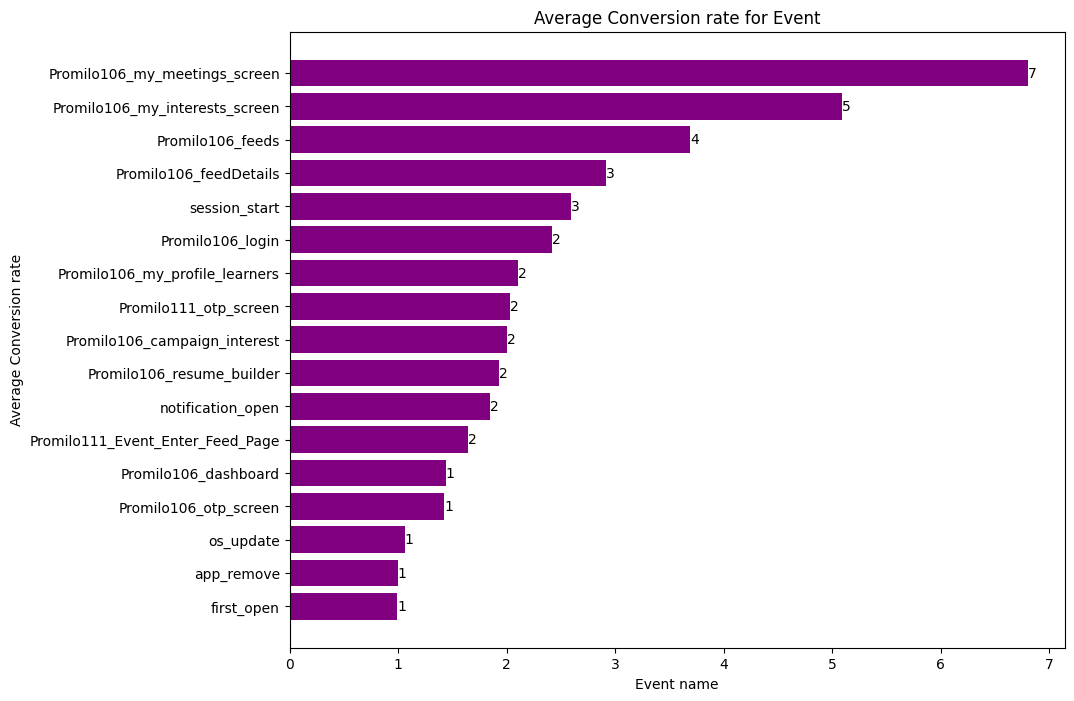

In [173]:
plt.figure(figsize=(10,8))

df4_sorted = df4.sort_values(by='avg_conversion_rate', ascending=False)
df4_sorted_n=df4_sorted.iloc[1:]

bars = plt.barh(df4_sorted_n['Event name'], df4_sorted_n['avg_conversion_rate'], color='purple')

plt.barh(df4_sorted_n['Event name'], df4_sorted_n['avg_conversion_rate'], color='purple')
plt.xlabel('Event name')
plt.ylabel('Average Conversion rate')
plt.title('Average Conversion rate for Event')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             '{:.0f}'.format(bar.get_width()),
             va='center', ha='left', color='black')

plt.show()

Conversions for Event

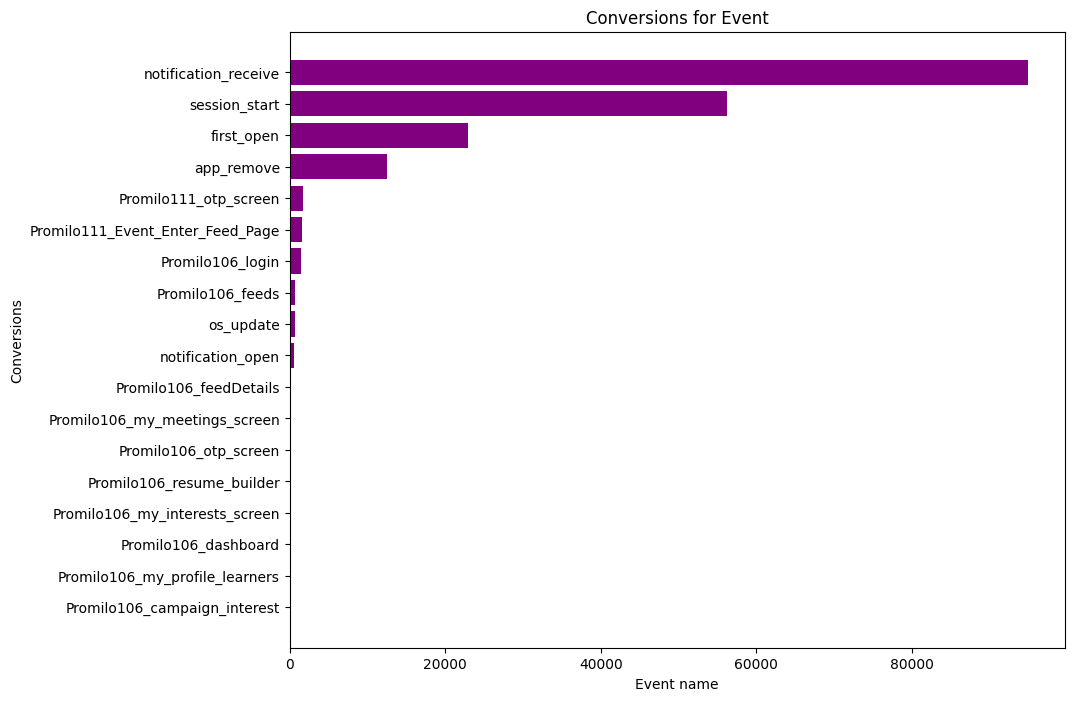

In [174]:
plt.figure(figsize=(10,8))

df4_sorted_c = df4.sort_values(by='Conversions', ascending=False)

plt.barh(df4_sorted_c['Event name'], df4_sorted_c['Conversions'], color='purple')
plt.xlabel('Event name')
plt.ylabel('Conversions')
plt.title('Conversions for Event')
plt.gca().invert_yaxis()
plt.show()

**Pages & Screens Report**

In [175]:
df5=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=5)
df5

,Page path and screen class,Views,Users,Views per user,Average engagement time,Event count,Conversions,Total revenue
0,Flutter,156708,8726,17.958740,83.412220,203901,328,0
1,MainActivity,44326,8978,4.937180,78.292160,53374,101,0
2,feeds,18514,4358,4.248279,61.600050,37628,253,0
3,login,16883,7291,2.315595,34.881770,40772,435,0
4,my_rewards_screen,15381,2045,7.521271,94.179950,32910,5,0
5,storyboard,8189,5244,1.561594,5.341152,15676,115,0
6,SignInHubActivity,6650,3778,1.760191,0.003176,6653,0,0
7,registration_screen,5501,3566,1.542625,45.075720,13496,136,0
8,feedDetails,3971,1047,3.792741,69.316140,7820,84,0
9,otp_screen,3291,1678,1.961263,46.864720,10833,32,0


In [176]:
df5 = df5.drop(df5[df5['Page path and screen class'] == '(not set)'].index)

In [177]:
correlation = df5['Views per user'].corr(df5['Conversions'])

print(f"Correlation coefficient between Views per user and conversions: {correlation}")

Correlation coefficient between Views per user and conversions: 0.4084165026109466


Factors Influencing Page path and Screen class

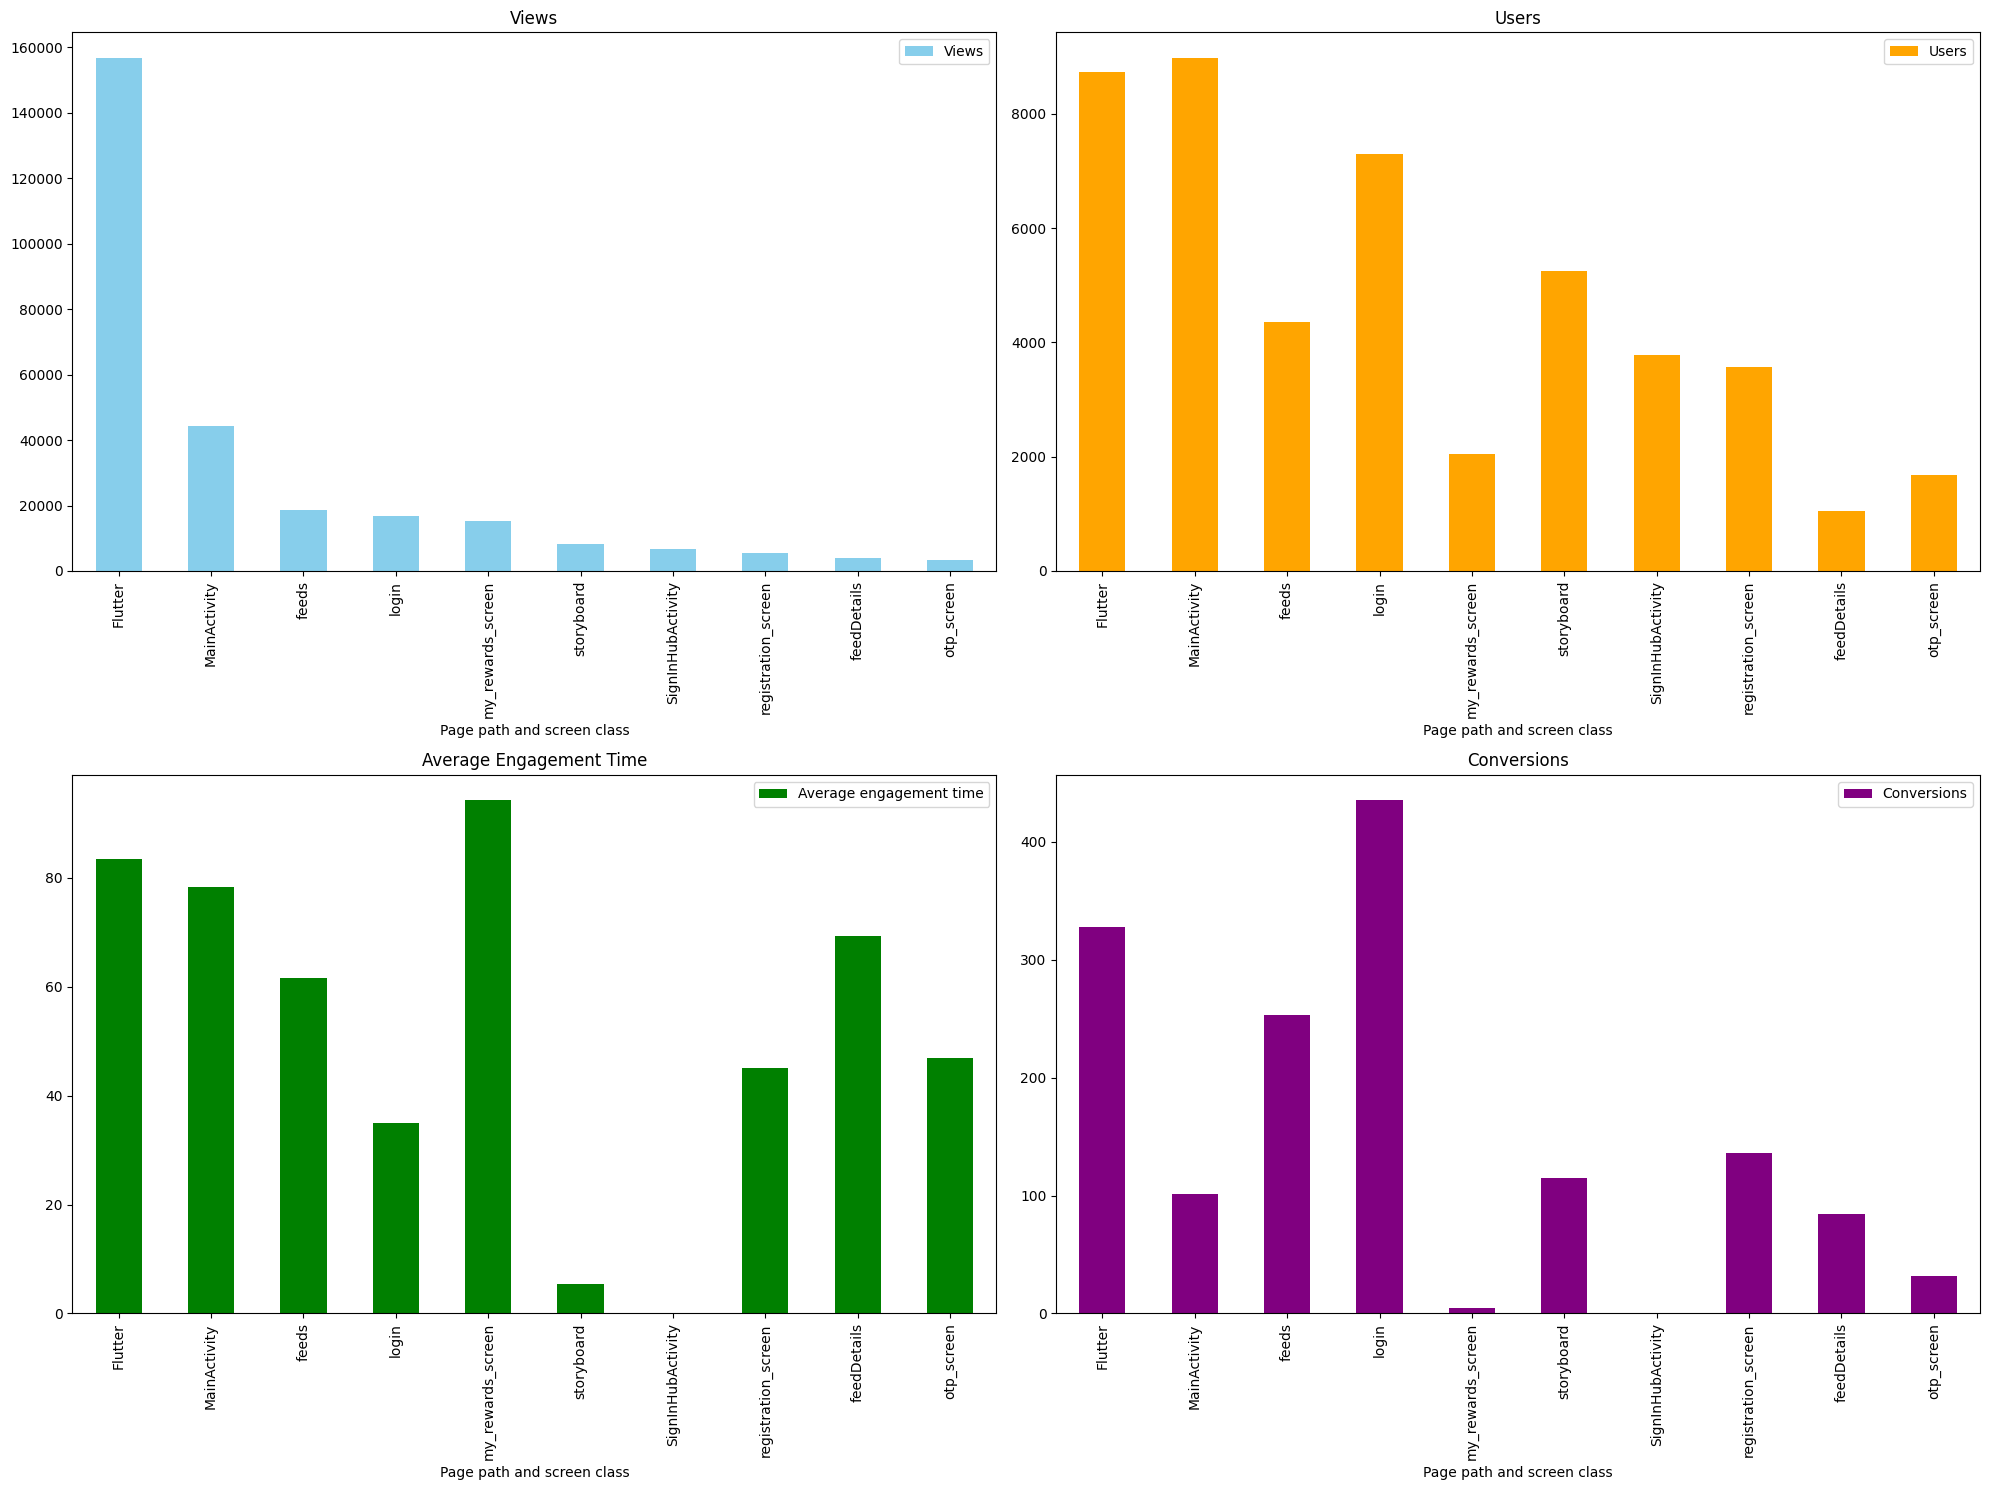

In [178]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

df5_top_10 = df5.sort_values(by='Views', ascending=False).head(10)

df5_top_10.plot(kind='bar', x='Page path and screen class', y='Views', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Views')

df5_top_10.plot(kind='bar', x='Page path and screen class', y='Users', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Users')

df5_top_10.plot(kind='bar', x='Page path and screen class', y='Average engagement time', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Average Engagement Time')

df5_top_10.plot(kind='bar', x='Page path and screen class', y='Conversions', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Conversions')

plt.tight_layout()
plt.show()

Relationship between Views per user and Conversions

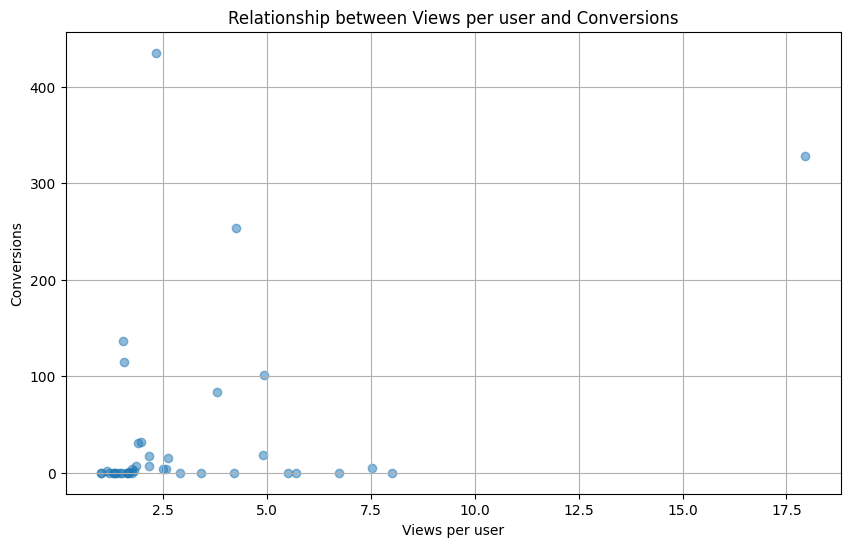

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(df5['Views per user'], df5['Conversions'], alpha=0.5)
plt.title('Relationship between Views per user and Conversions')
plt.xlabel('Views per user')
plt.ylabel('Conversions')
plt.grid(True)
plt.show()

**Demographics Report**

In [180]:
df6=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=8)
df6

,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,India,23024,22528,41479,0.593626,1.801555,334.81660,1312097,192766,0
1,United States,272,213,197,0.491272,0.724265,50.96324,3157,643,0
2,Canada,37,18,25,0.416667,0.675676,43.21622,410,121,0
3,(not set),36,36,17,0.459459,0.472222,24.80556,241,54,0
4,United Kingdom,20,8,13,0.371429,0.650000,61.85000,289,43,0
5,Singapore,17,6,13,0.419355,0.764706,70.00000,299,29,0
6,Japan,11,6,11,0.550000,1.000000,51.45455,283,24,0
7,Australia,10,7,8,0.500000,0.800000,26.90000,132,22,0
8,Bangladesh,7,2,10,0.625000,1.428571,49.85714,121,20,0
9,Germany,7,2,6,0.500000,0.857143,15.42857,82,9,0


In [181]:
df6 = df6.drop(df6[df6['Country'] == '(not set)'].index)

In [182]:
df6_n = df6[df6['Users'] >= 10]
df6_n.reset_index(drop=True, inplace=True)
df6_n

,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,India,23024,22528,41479,0.593626,1.801555,334.81660,1312097,192766,0
1,United States,272,213,197,0.491272,0.724265,50.96324,3157,643,0
2,Canada,37,18,25,0.416667,0.675676,43.21622,410,121,0
3,United Kingdom,20,8,13,0.371429,0.650000,61.85000,289,43,0
4,Singapore,17,6,13,0.419355,0.764706,70.00000,299,29,0
5,Japan,11,6,11,0.550000,1.000000,51.45455,283,24,0
6,Australia,10,7,8,0.500000,0.800000,26.90000,132,22,0


In [183]:
df6_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    7 non-null      object 
 1   Users                      7 non-null      int64  
 2   New users                  7 non-null      int64  
 3   Engaged sessions           7 non-null      int64  
 4   Engagement rate            7 non-null      float64
 5   Engaged sessions per user  7 non-null      float64
 6   Average engagement time    7 non-null      float64
 7   Event count                7 non-null      int64  
 8   Conversions                7 non-null      int64  
 9   Total revenue              7 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 688.0+ bytes


New Users vs Users by Country

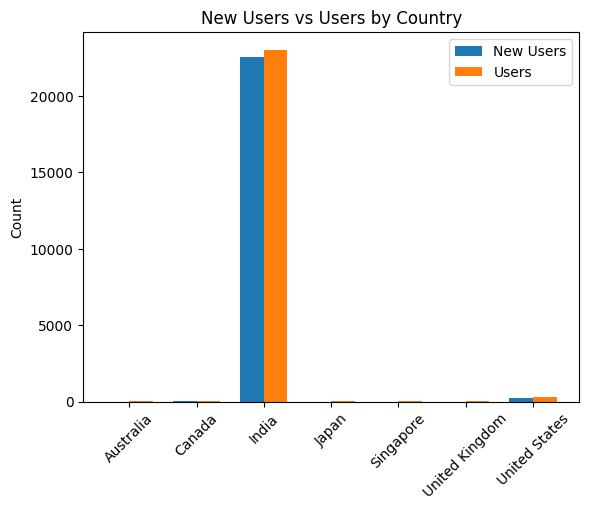

In [184]:
df6_n_bar = df6_n.groupby('Country')[['New users', 'Users']].sum()

labels = df6_n_bar.index
new_users = df6_n_bar['New users']
Users = df6_n_bar['Users']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_users, width, label='New Users')
rects2 = ax.bar(x + width/2, Users, width, label='Users')

ax.set_ylabel('Count')
ax.set_title('New Users vs Users by Country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

Conversions by User Country

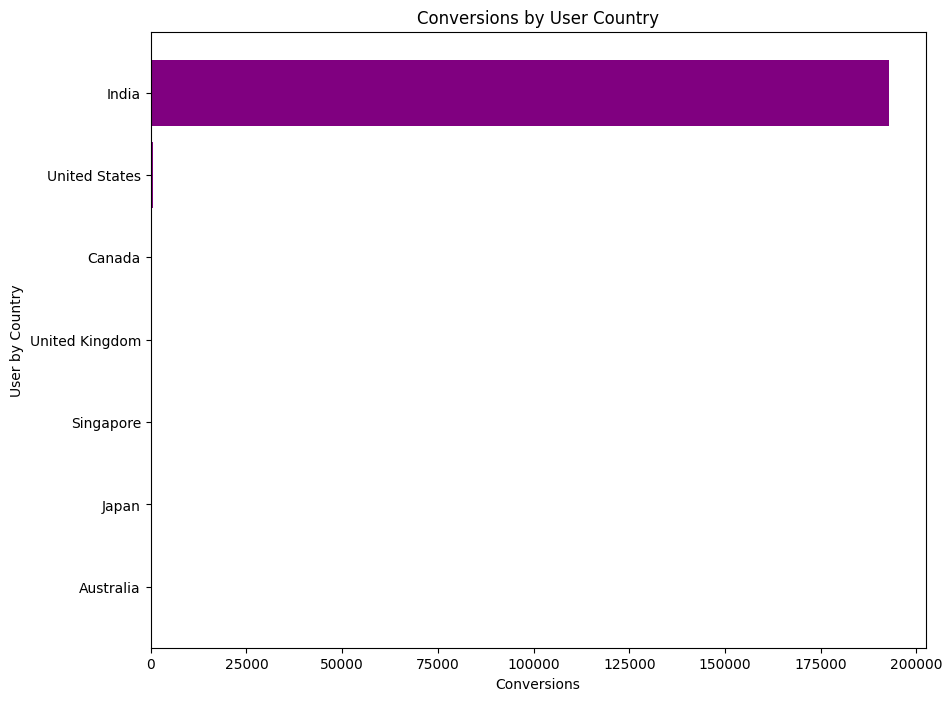

In [185]:
plt.figure(figsize=(10,8))
plt.barh(df6_n['Country'], df6_n['Conversions'], color='purple')
plt.xlabel('Conversions')
plt.ylabel('User by Country')
plt.title('Conversions by User Country')
plt.gca().invert_yaxis()
plt.show()

**Citiwise Report**

In [186]:
df7=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=9)
df7

,Town/City,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Bengaluru,6097,5685,15013,0.769385,2.462359,762.20550,607200,62939,0
1,Patna,1594,1467,2127,0.440646,1.334379,98.22208,38830,6980,0
2,Hyderabad,1038,920,1578,0.569264,1.520231,243.69080,96826,34103,0
3,Indore,983,915,1241,0.426460,1.262462,67.89115,21383,4121,0
4,Lucknow,897,839,1125,0.450180,1.254181,83.40580,21041,3650,0
...,...,...,...,...,...,...,...,...,...,...
569,Titwala,0,0,0,0.000000,0.000000,0.00000,1,1,0
570,Vagator,0,0,0,0.000000,0.000000,0.00000,16,16,0
571,Vellakoil,0,0,0,0.000000,0.000000,0.00000,1,0,0
572,Wardha,0,0,0,0.000000,0.000000,0.00000,1,1,0


In [187]:
df7 = df7.drop(df7[df7['Town/City'] == '(not set)'].index)

In [188]:
df7_n = df7[df7['Users'] >= 10]
df7_n.reset_index(drop=True, inplace=True)
df7_n

,Town/City,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Bengaluru,6097,5685,15013,0.769385,2.462359,762.20550,607200,62939,0
1,Patna,1594,1467,2127,0.440646,1.334379,98.22208,38830,6980,0
2,Hyderabad,1038,920,1578,0.569264,1.520231,243.69080,96826,34103,0
3,Indore,983,915,1241,0.426460,1.262462,67.89115,21383,4121,0
4,Lucknow,897,839,1125,0.450180,1.254181,83.40580,21041,3650,0
...,...,...,...,...,...,...,...,...,...,...
120,Dhanbad,10,10,16,0.727273,1.600000,205.60000,467,36,0
121,Jamshedpur,10,8,8,0.235294,0.800000,16.00000,144,42,0
122,London,10,3,9,0.450000,0.900000,32.40000,118,22,0
123,Sydney,10,7,8,0.500000,0.800000,26.90000,132,22,0


In [189]:
df7_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Town/City                  125 non-null    object 
 1   Users                      125 non-null    int64  
 2   New users                  125 non-null    int64  
 3   Engaged sessions           125 non-null    int64  
 4   Engagement rate            125 non-null    float64
 5   Engaged sessions per user  125 non-null    float64
 6   Average engagement time    125 non-null    float64
 7   Event count                125 non-null    int64  
 8   Conversions                125 non-null    int64  
 9   Total revenue              125 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 9.9+ KB


In [190]:
top_15_conversion = df7_n.nlargest(15, 'Conversions')
top_15_conversion.reset_index(drop=True, inplace=True)
top_15_conversion

,Town/City,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Bengaluru,6097,5685,15013,0.769385,2.462359,762.20550,607200,62939,0
1,Hyderabad,1038,920,1578,0.569264,1.520231,243.69080,96826,34103,0
2,Chennai,798,631,1910,0.706361,2.393484,329.73430,84723,9772,0
3,Patna,1594,1467,2127,0.440646,1.334379,98.22208,38830,6980,0
4,Mysuru,809,585,1220,0.630491,1.508035,331.34730,48183,5735,0
5,Bhubaneswar,572,551,658,0.445498,1.150350,85.56119,16643,5463,0
6,Coimbatore,749,596,1412,0.635178,1.885180,329.57010,41275,4602,0
7,Indore,983,915,1241,0.426460,1.262462,67.89115,21383,4121,0
8,Lucknow,897,839,1125,0.450180,1.254181,83.40580,21041,3650,0
9,Kochi,655,573,1049,0.545786,1.601527,265.98930,27187,3633,0


Top 15 Conversions by User City

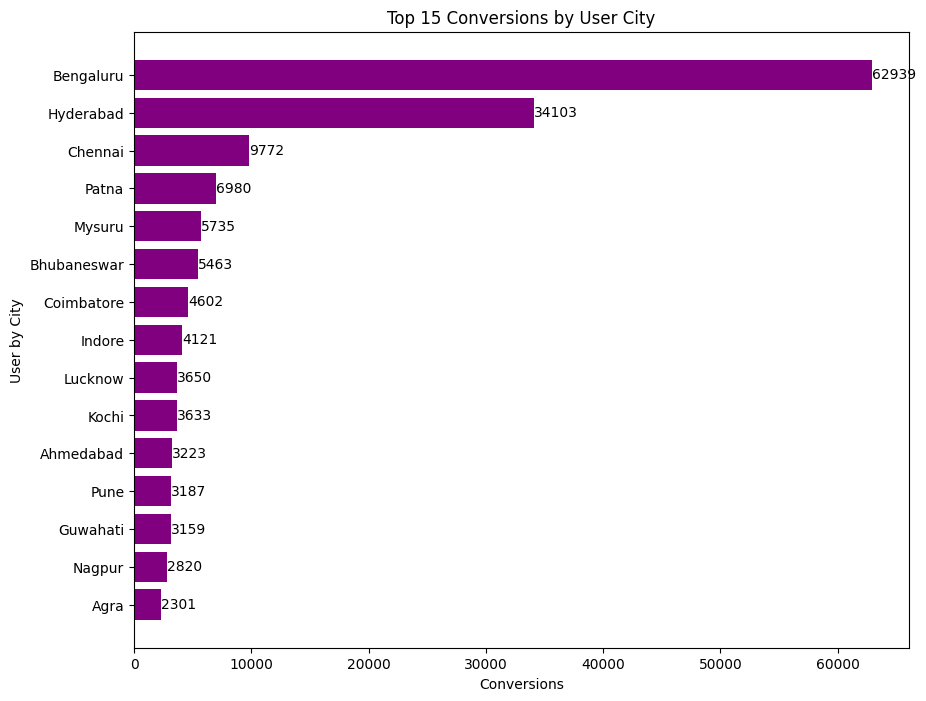

In [191]:
plt.figure(figsize=(10,8))
bars = plt.barh(top_15_conversion['Town/City'], top_15_conversion['Conversions'], color='purple')

plt.barh(top_15_conversion['Town/City'], top_15_conversion['Conversions'], color='purple')
plt.xlabel('Conversions')
plt.ylabel('User by City')
plt.title('Top 15 Conversions by User City')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width),
             ha='left', va='center', color='black', fontsize=10)

plt.show()

**Gender Report**

In [192]:
df8=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=10)
df8

,Gender,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,unknown,13142,12691,23161,0.564077,1.762365,439.5776,761771,93180,0
1,male,7218,5877,10467,0.543091,1.450125,128.2319,282504,65651,0
2,female,4944,4304,7877,0.637710,1.593244,208.7407,274254,35083,0


In [193]:
df8 = df8.drop(df8[df8['Gender'] == 'unknown'].index)

In [194]:
df8

,Gender,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
1,male,7218,5877,10467,0.543091,1.450125,128.2319,282504,65651,0
2,female,4944,4304,7877,0.637710,1.593244,208.7407,274254,35083,0


New Users vs Users by Gender

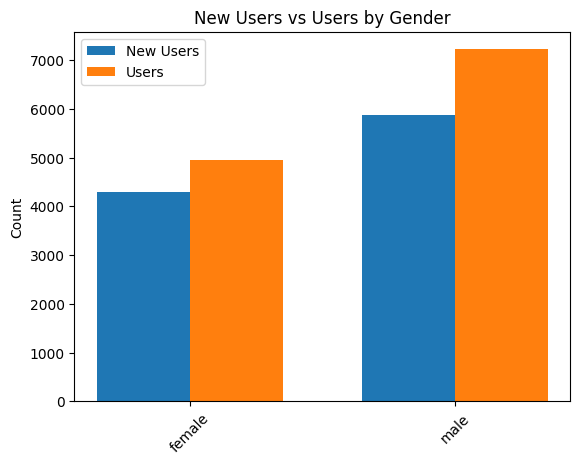

In [195]:
df8_bar = df8.groupby('Gender')[['New users', 'Users']].sum()

labels = df8_bar.index
new_users = df8_bar['New users']
Users = df8_bar['Users']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_users, width, label='New Users')
rects2 = ax.bar(x + width/2, Users, width, label='Users')

ax.set_ylabel('Count')
ax.set_title('New Users vs Users by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.show()

Conversions by Gender

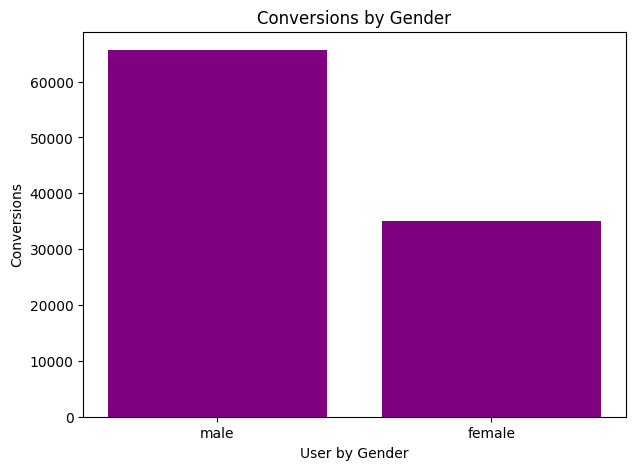

In [196]:
plt.figure(figsize=(7,5))
plt.bar(df8['Gender'], df8['Conversions'], color='purple')
plt.xlabel('User by Gender')
plt.ylabel('Conversions')
plt.title('Conversions by Gender')
plt.show()

**User By Interest**

In [197]:
df9=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=11)
df9

,Interests,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,Shoppers,10950,9256,15652,0.581534,1.429406,162.83470,490664,86846,0
1,Media & Entertainment/Comics & Animation Fans,10946,9247,15680,0.583008,1.432487,165.17720,491025,86845,0
2,Technology/Mobile Enthusiasts,10934,9239,15619,0.582451,1.428480,162.69450,489353,86742,0
3,Food & Dining/Cooking Enthusiasts,8410,6970,12332,0.602325,1.466350,176.95670,409713,73814,0
4,Sports & Fitness/Health & Fitness Buffs,5844,4580,8226,0.588328,1.407598,155.14510,257831,43074,0
...,...,...,...,...,...,...,...,...,...,...
84,Food & Dining,15,4,24,0.489796,1.600000,70.86667,460,58,0
85,Home & Garden,15,5,12,0.631579,0.800000,133.86670,453,107,0
86,Sports & Fitness/Sports Fans/Racquetball Enthu...,11,11,21,0.840000,1.909091,487.45450,736,39,0
87,Vehicles & Transportation,11,3,9,0.450000,0.818182,71.54545,161,27,0


In [198]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Interests                  89 non-null     object 
 1   Users                      89 non-null     int64  
 2   New users                  89 non-null     int64  
 3   Engaged sessions           89 non-null     int64  
 4   Engagement rate            89 non-null     float64
 5   Engaged sessions per user  89 non-null     float64
 6   Average engagement time    89 non-null     float64
 7   Event count                89 non-null     int64  
 8   Conversions                89 non-null     int64  
 9   Total revenue              89 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 7.1+ KB


In [199]:
a='Sports & Fitness/Health & Fitness Buffs'

In [200]:
a.split('/')[0]

'Sports & Fitness'

In [201]:
df9['Interests']=df9['Interests'].apply(lambda a:a.split('/')[0])

In [202]:
df9['Interests']

0                      Shoppers
1         Media & Entertainment
2                    Technology
3                 Food & Dining
4              Sports & Fitness
                ...            
84                Food & Dining
85                Home & Garden
86             Sports & Fitness
87    Vehicles & Transportation
88             Sports & Fitness
Name: Interests, Length: 89, dtype: object

In [203]:
df9['Interests'].value_counts()

Media & Entertainment        29
Lifestyles & Hobbies         12
Food & Dining                10
Sports & Fitness              9
Shoppers                      8
News & Politics               5
Technology                    3
Vehicles & Transportation     3
Home & Garden                 3
Beauty & Wellness             3
Travel                        2
Banking & Finance             2
Name: Interests, dtype: int64

Conversions by User Interest

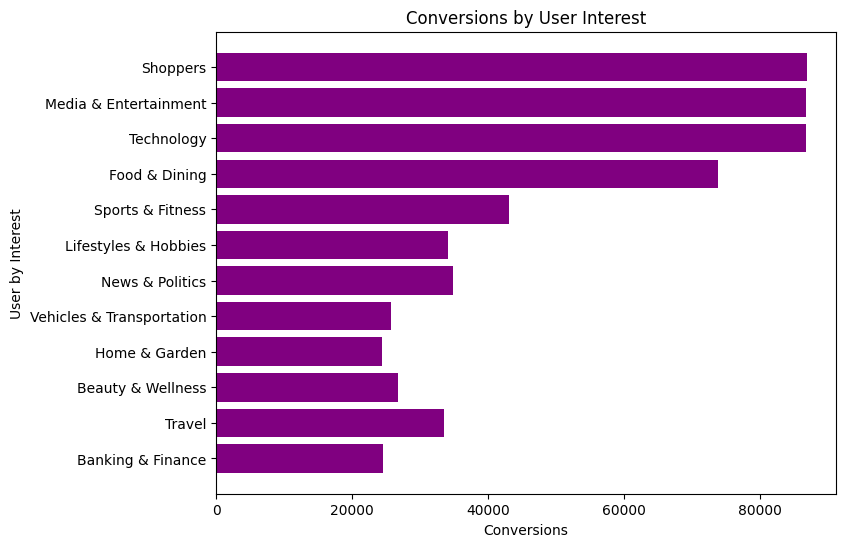

In [204]:
plt.figure(figsize=(8,6))

plt.barh(df9['Interests'], df9['Conversions'], color='purple')
plt.xlabel('Conversions')
plt.ylabel('User by Interest')
plt.title('Conversions by User Interest')

plt.gca().invert_yaxis()
plt.show()

Factors Influencing User Interests

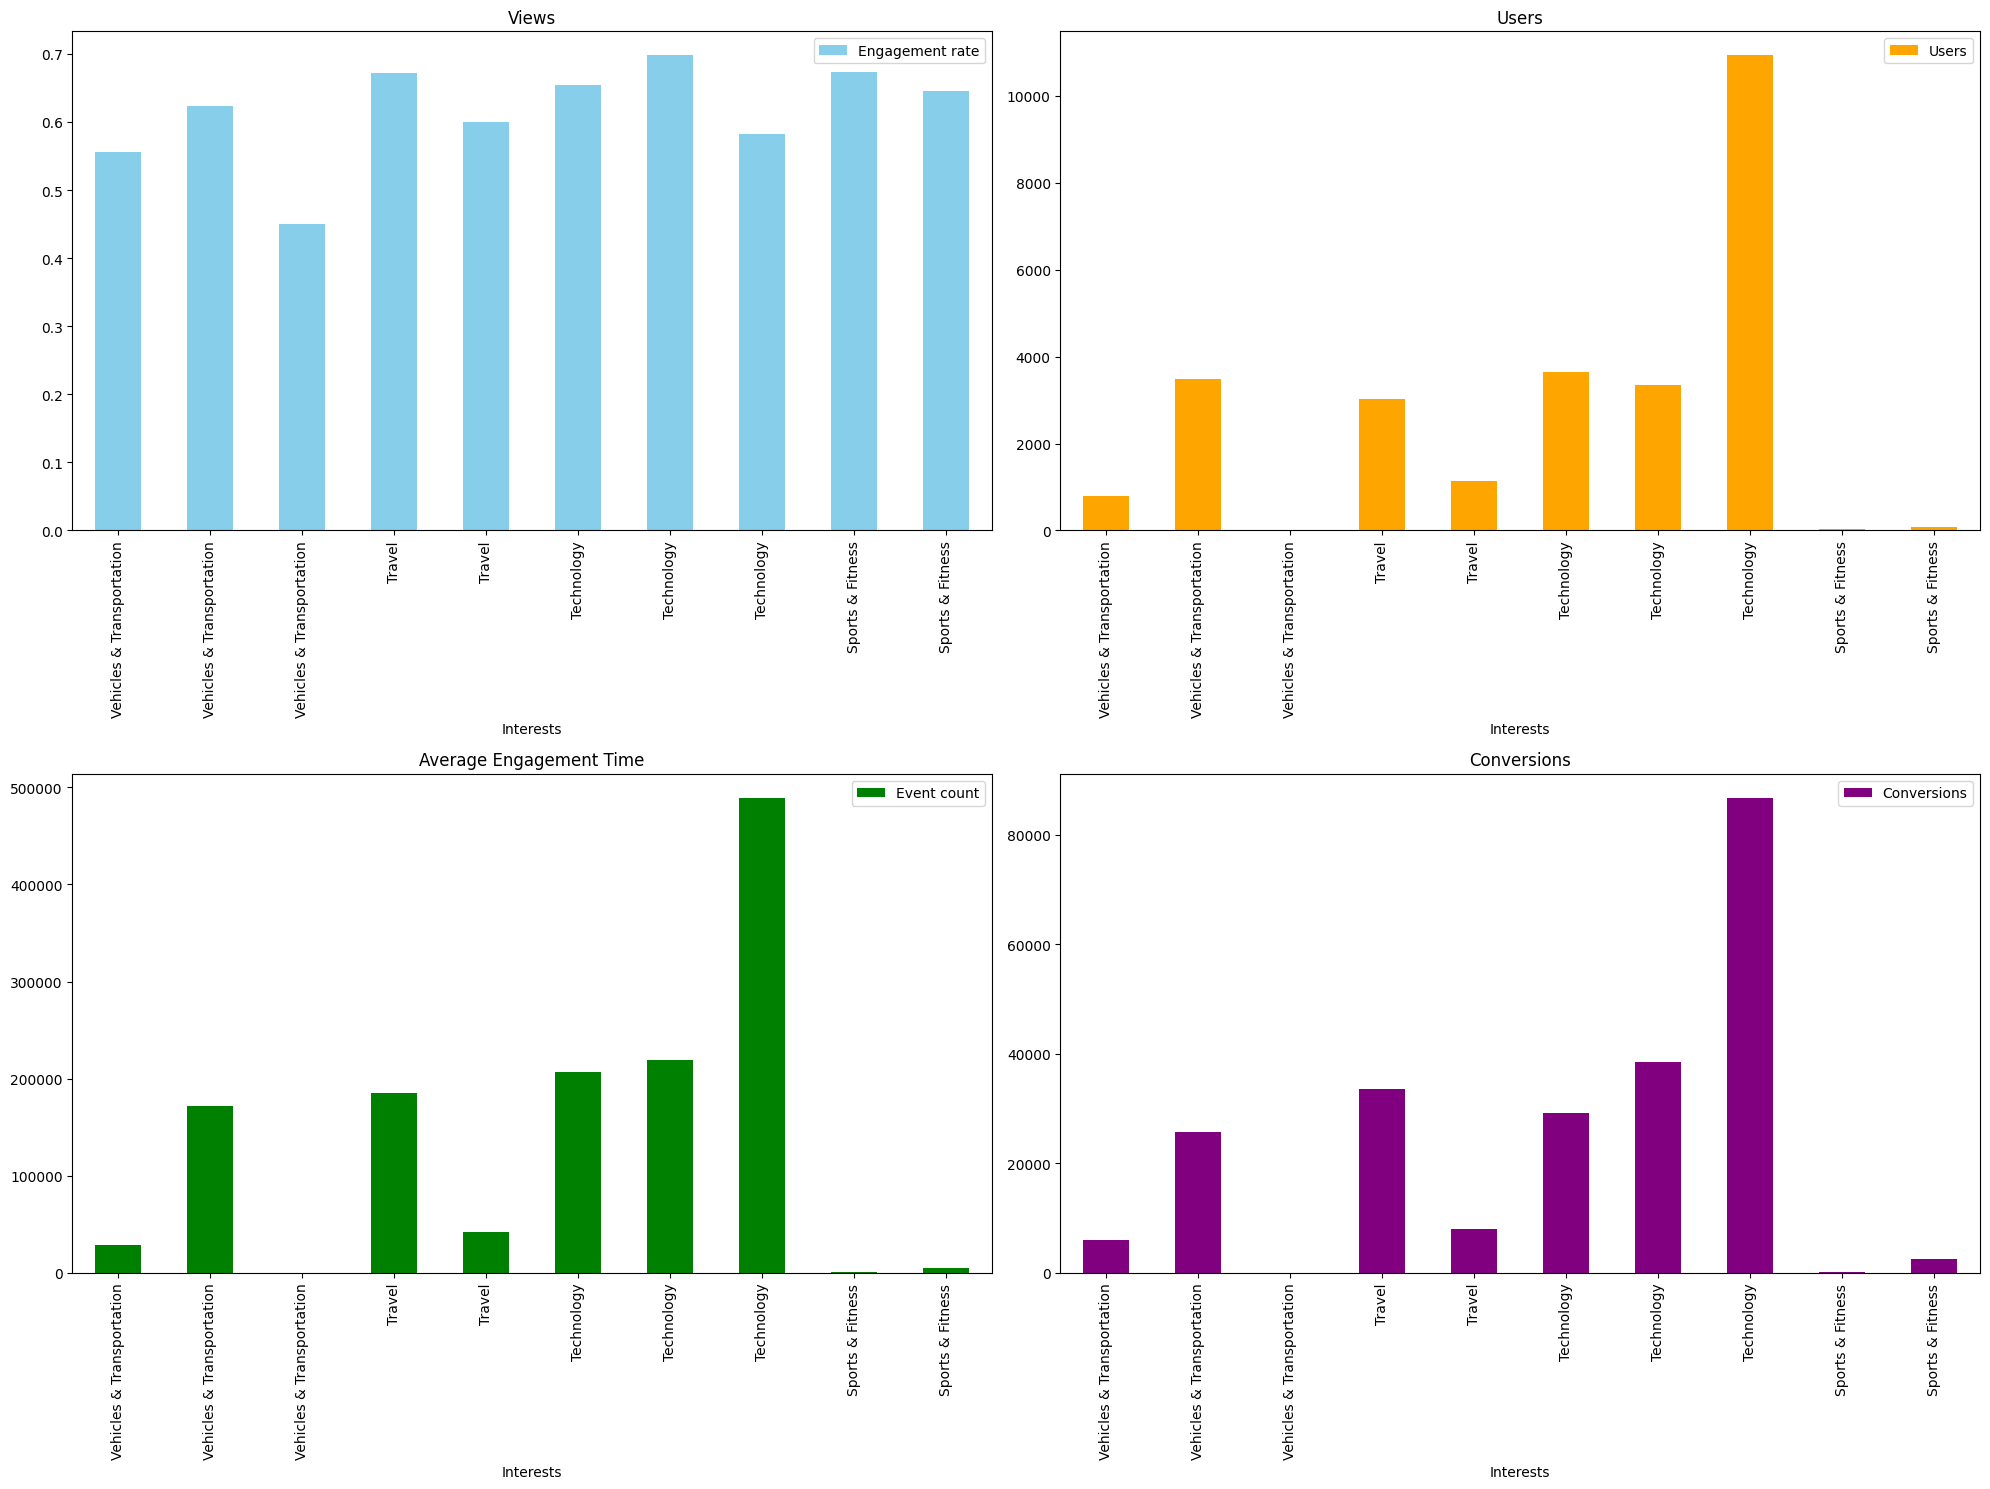

In [205]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

df9_top_10 = df9.sort_values(by='Interests', ascending=False).head(10)

df9_top_10.plot(kind='bar', x='Interests', y='Engagement rate', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Views')

df9_top_10.plot(kind='bar', x='Interests', y='Users', ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Users')

df9_top_10.plot(kind='bar', x='Interests', y='Event count', ax=axs[1, 0], color='green')
axs[1, 0].set_title('Average Engagement Time')

df9_top_10.plot(kind='bar', x='Interests', y='Conversions', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Conversions')

plt.tight_layout()
plt.show()

In [206]:
grouped = df9.groupby('Interests').mean()
grouped

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
Interests,,,,,,,,,
Banking & Finance,1206.500000,932.500000,1579.500000,0.550727,1.045465,130.416900,51091.500000,12322.500000,0.0
Beauty & Wellness,1800.666667,1391.666667,2507.666667,0.626835,1.359293,219.195300,92782.666667,17425.333333,0.0
Food & Dining,2957.200000,2375.400000,4176.100000,0.639121,1.404335,145.995507,141659.300000,25335.500000,0.0
Home & Garden,2096.666667,1619.000000,2809.333333,0.608689,1.163887,130.809400,85874.666667,12918.000000,0.0
Lifestyles & Hobbies,3116.166667,2476.333333,4374.333333,0.625475,1.373834,156.969967,144608.416667,23823.833333,0.0
Media & Entertainment,1934.758621,1505.724138,2648.379310,0.591350,1.274271,213.181361,84929.034483,15838.241379,0.0
News & Politics,2008.800000,1561.000000,2728.000000,0.610141,1.196241,134.910994,77618.000000,14025.400000,0.0
Shoppers,3269.125000,2652.625000,4642.000000,0.646221,1.476079,585.450438,155751.250000,26809.375000,0.0
Sports & Fitness,1644.888889,1284.222222,2246.333333,0.688622,1.478505,222.719422,67623.000000,12252.111111,0.0


**User by Language**

In [207]:
df10=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=12)
df10

,Language,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,English,22495,21990,40639,0.595147,1.806579,341.36350,1297970,189946,0
1,Hindi,586,552,798,0.406314,1.361775,60.03413,13523,2699,0
2,Marathi,85,84,98,0.426087,1.152941,38.48235,1589,323,0
3,Gujarati,78,77,100,0.448430,1.282051,46.53846,1794,327,0
4,Telugu,43,42,56,0.455285,1.302326,36.65116,812,170,0
5,Tamil,36,36,43,0.518072,1.194444,45.86111,615,115,0
6,Malayalam,17,15,36,0.654545,2.117647,161.94120,548,71,0
7,Bengali,14,11,18,0.600000,1.285714,50.07143,217,39,0
8,Chinese,13,13,13,1.000000,1.000000,136.76920,138,20,0
9,Kannada,13,12,31,0.500000,2.384615,249.07690,680,75,0


In [208]:
df10_n = df10[df10['Users'] >= 9]
df10_n.reset_index(drop=True, inplace=True)
df10_n

,Language,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,English,22495,21990,40639,0.595147,1.806579,341.36350,1297970,189946,0
1,Hindi,586,552,798,0.406314,1.361775,60.03413,13523,2699,0
2,Marathi,85,84,98,0.426087,1.152941,38.48235,1589,323,0
3,Gujarati,78,77,100,0.448430,1.282051,46.53846,1794,327,0
4,Telugu,43,42,56,0.455285,1.302326,36.65116,812,170,0
5,Tamil,36,36,43,0.518072,1.194444,45.86111,615,115,0
6,Malayalam,17,15,36,0.654545,2.117647,161.94120,548,71,0
7,Bengali,14,11,18,0.600000,1.285714,50.07143,217,39,0
8,Chinese,13,13,13,1.000000,1.000000,136.76920,138,20,0
9,Kannada,13,12,31,0.500000,2.384615,249.07690,680,75,0


Conversions by Language

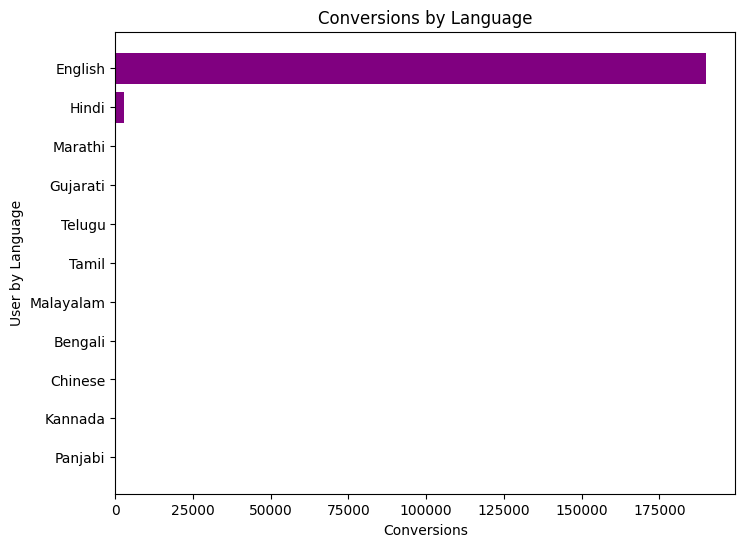

In [209]:
plt.figure(figsize=(8,6))

plt.barh(df10_n['Language'], df10_n['Conversions'], color='purple')
plt.xlabel('Conversions')
plt.ylabel('User by Language')
plt.title('Conversions by Language')

plt.gca().invert_yaxis()
plt.show()

In [210]:
df11=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=13)
df11

,Age,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,unknown,14303,13636,24976,0.569098,1.746207,422.22330,817501,99310,0
1,18-24,4282,3678,7291,0.695308,1.702709,251.16300,309328,53661,0
2,25-34,2920,2161,3749,0.504780,1.283904,97.24144,90074,20172,0
3,65+,1422,1081,1640,0.539829,1.153305,52.30661,24780,4891,0
4,55-64,1403,979,1552,0.519411,1.106201,55.37063,25169,4823,0
5,35-44,1202,785,1420,0.510424,1.181364,96.08236,33016,8111,0
6,45-54,810,552,881,0.561862,1.087654,84.54321,18661,2946,0


In [211]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7 non-null      object 
 1   Users                      7 non-null      int64  
 2   New users                  7 non-null      int64  
 3   Engaged sessions           7 non-null      int64  
 4   Engagement rate            7 non-null      float64
 5   Engaged sessions per user  7 non-null      float64
 6   Average engagement time    7 non-null      float64
 7   Event count                7 non-null      int64  
 8   Conversions                7 non-null      int64  
 9   Total revenue              7 non-null      int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 688.0+ bytes


In [212]:
df11=df11.drop(df11[df11['Age'] == 'unknown'].index)

In [213]:
df11

,Age,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
1,18-24,4282,3678,7291,0.695308,1.702709,251.16300,309328,53661,0
2,25-34,2920,2161,3749,0.504780,1.283904,97.24144,90074,20172,0
3,65+,1422,1081,1640,0.539829,1.153305,52.30661,24780,4891,0
4,55-64,1403,979,1552,0.519411,1.106201,55.37063,25169,4823,0
5,35-44,1202,785,1420,0.510424,1.181364,96.08236,33016,8111,0
6,45-54,810,552,881,0.561862,1.087654,84.54321,18661,2946,0


Users by Age Group

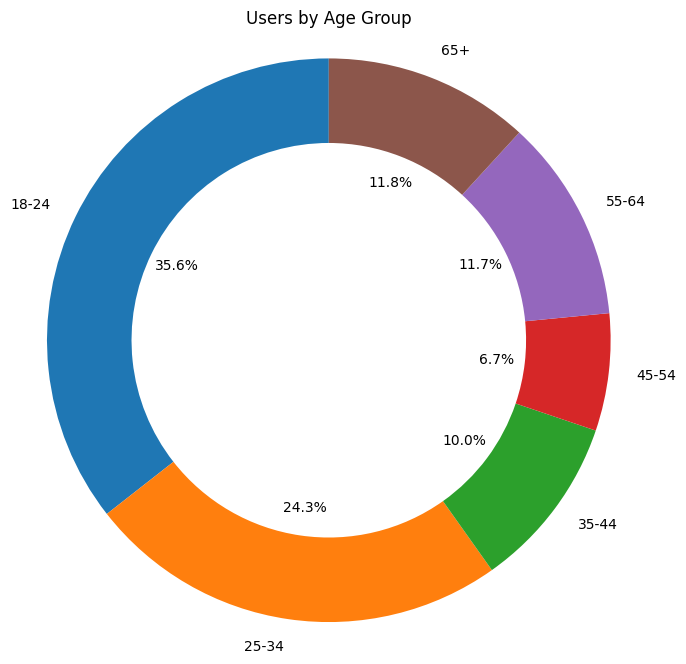

In [214]:
df11_pie = df11.groupby('Age')['Users'].sum()

plt.figure(figsize=(8, 8))
plt.pie(df11_pie, labels=df11_pie.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Users by Age Group')
plt.show()

In [215]:
df12=pd.read_excel("/content/drive/MyDrive/Data Science Mk/Projects/Datasets/Data set for BA.xlsx",sheet_name=14)
df12

,Session Google Ads campaign,Users,Sessions,Engaged sessions,Google Ads clicks,Google Ads cost,Google Ads cost per click,Conversions,Cost per conversion,Event count,Total revenue,Return on ad spend
0,App Installation for May --Shahid,5429,10936,6276,147100,179175.00000,1.218049,12257,14.618180,97802,0,0
1,App Install-States-A200Inst-20Jun22,842,1655,968,28742,24309.13000,0.845770,1794,13.550240,15311,0,0
2,App Install-States-B100Installs-22Jun22,742,1332,780,17809,22374.58000,1.256363,1422,15.734580,11640,0,0
3,App Install for April -- Shahid,473,976,546,19302,20525.18000,1.063370,1115,18.408230,8001,0,0
4,Video-AppInstall-PS-Internships-11Jul22,510,966,515,9831,6377.83300,0.648747,1032,6.180071,10323,0,0
5,App promotion-App-3,732,945,763,5793,12084.04000,2.085972,922,13.106330,10825,0,0
6,App Instal-States-B200 &A100Inst-22Jun22,373,742,425,10595,11993.01000,1.131950,851,14.092850,7504,0,0
7,App Install-1to5NC-StateA200-07Jul22,370,610,462,3659,8839.72300,2.415885,709,12.467870,10864,0,0
8,App Instal-6to10NC-States-A200Inst-07Jul22,242,432,296,4475,9204.69600,2.056915,630,14.610630,6092,0,0
9,Video-AppInstall-PS-Browsing-11Jul22,91,188,112,1899,1535.27000,0.808462,206,7.452768,2172,0,0


Conversion Rate and ROI

In [216]:
df12['Conversion Rate'] = (df12['Conversions'] / df12['Google Ads clicks']) * 100


# Assuming Average Revenue per Conversion is 50
average_revenue_per_conversion = 50

df12['Total Cost'] = df12['Google Ads cost']
df12['Total Revenue'] = df12['Conversions'] * average_revenue_per_conversion

df12['ROI'] = ((df12['Total Revenue'] - df12['Total Cost']) / df12['Total Cost']) * 100


df12[['Session Google Ads campaign', 'Conversion Rate', 'ROI']]

,Session Google Ads campaign,Conversion Rate,ROI
0,App Installation for May --Shahid,8.332427,242.039905
1,App Install-States-A200Inst-20Jun22,6.241737,268.997163
2,App Install-States-B100Installs-22Jun22,7.984727,217.771328
3,App Install for April -- Shahid,5.776603,171.617594
4,Video-AppInstall-PS-Internships-11Jul22,10.497406,709.052228
5,App promotion-App-3,15.915760,281.494931
6,App Instal-States-B200 &A100Inst-22Jun22,8.032091,254.789999
7,App Install-1to5NC-StateA200-07Jul22,19.376879,301.030666
8,App Instal-6to10NC-States-A200Inst-07Jul22,14.078212,242.216625
9,Video-AppInstall-PS-Browsing-11Jul22,10.847815,570.891765


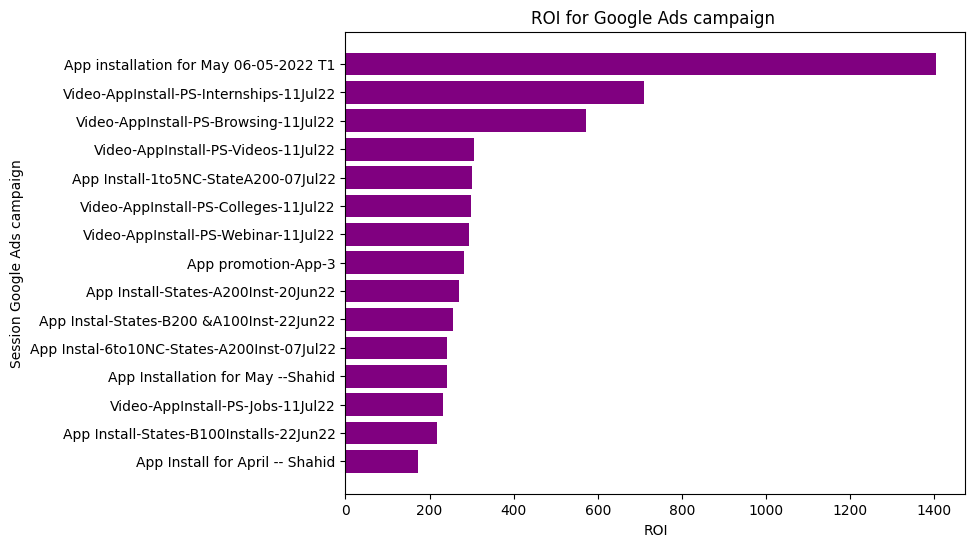

In [217]:
plt.figure(figsize=(8,6))

df12_sorted = df12.sort_values(by='ROI', ascending=False)

plt.barh(df12_sorted['Session Google Ads campaign'], df12_sorted['ROI'], color='purple')
plt.xlabel('ROI')
plt.ylabel('Session Google Ads campaign')
plt.title('ROI for Google Ads campaign ')

plt.gca().invert_yaxis()
plt.show()

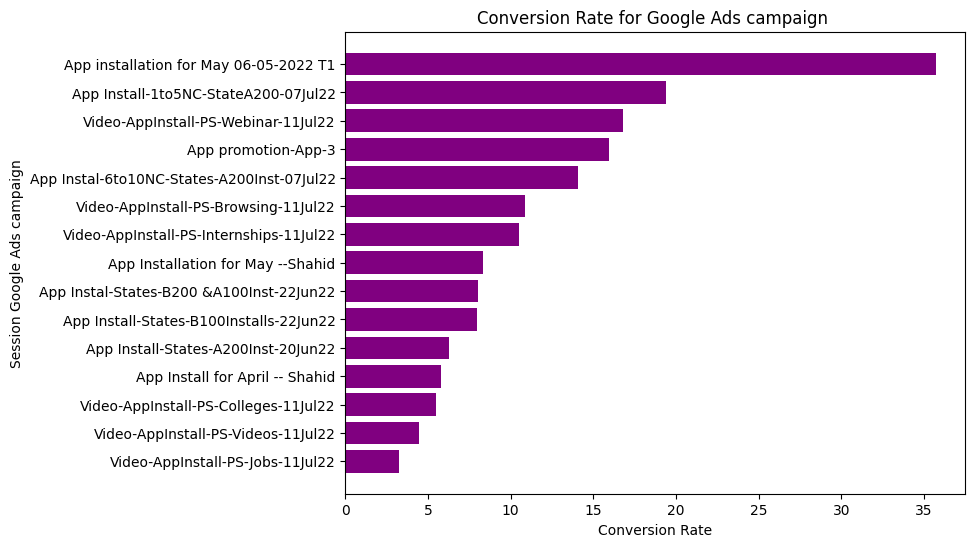

In [218]:
plt.figure(figsize=(8,6))

df12_sorted = df12.sort_values(by='Conversion Rate', ascending=False)

plt.barh(df12_sorted['Session Google Ads campaign'], df12_sorted['Conversion Rate'], color='purple')
plt.xlabel('Conversion Rate')
plt.ylabel('Session Google Ads campaign')
plt.title('Conversion Rate for Google Ads campaign ')

plt.gca().invert_yaxis()
plt.show()

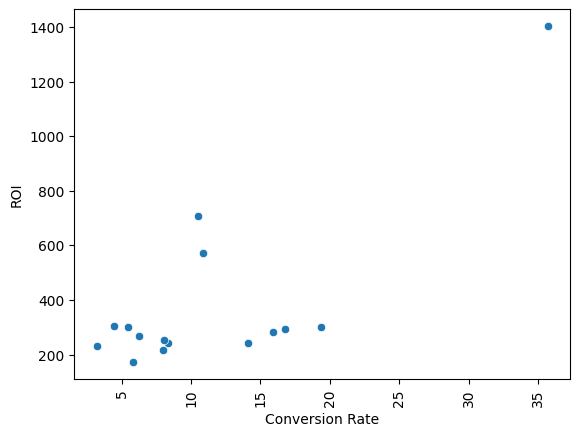

In [219]:
sns.scatterplot(x=df12['Conversion Rate'],y=df12['ROI'])
plt.xticks(rotation=90)
plt.show()